# IE 360 HW 4-5

In [1]:
install.packages("readxl")
library(readxl)
install.packages("stats")
library(stats)
library(dplyr)
library(xts)
library(data.table)
library(forecast)
library(ggplot2)
install.packages("reshape")
library(reshape)

Installing package into 'C:/Users/ataberk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ataberk\AppData\Local\Temp\Rtmpof2gVc\downloaded_packages


Warning message:
"package 'readxl' was built under R version 3.6.3"Installing package into 'C:/Users/ataberk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'stats' is not available (for R version 3.6.1)"Warning message:
"package 'stats' is a base package, and should not be updated"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last

Warning message:
"package 'data.table' was built u

package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ataberk\AppData\Local\Temp\Rtmpof2gVc\downloaded_packages


Warning message:
"package 'reshape' was built under R version 3.6.3"
Attaching package: 'reshape'

The following object is masked from 'package:data.table':

    melt

The following object is masked from 'package:dplyr':

    rename



In [2]:
install.packages("astsa")
library(astsa)

Installing package into 'C:/Users/ataberk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ataberk\AppData\Local\Temp\Rtmpof2gVc\downloaded_packages


Warning message:
"package 'astsa' was built under R version 3.6.3"
Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas



Installing required libraries.

In [127]:
data <- read.csv("C:/Users/ataberk/Desktop/Metro_Interstate_Traffic_Volume.csv")

Reading the data


## Exploratory Analysis

In [28]:
str(data)

'data.frame':	48204 obs. of  9 variables:
 $ holiday            : Factor w/ 12 levels "Christmas Day",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ temp               : num  288 289 290 290 291 ...
 $ rain_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ snow_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ clouds_all         : int  40 75 90 90 75 1 1 1 20 20 ...
 $ weather_main       : Factor w/ 11 levels "Clear","Clouds",..: 2 2 2 2 2 1 1 1 2 2 ...
 $ weather_description: Factor w/ 38 levels "broken clouds",..: 23 1 18 18 1 26 26 26 3 3 ...
 $ date_time          : Factor w/ 40575 levels "2012-10-02 09:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ traffic_volume     : int  5545 4516 4767 5026 4918 5181 5584 6015 5791 4770 ...


Our data compose of 9 variables. 4 of them are factorized.

In [128]:
dataxts <- xts(data$traffic_volume, order.by=as.POSIXct(data$date_time))

I created a xts object in order to get a better plot.

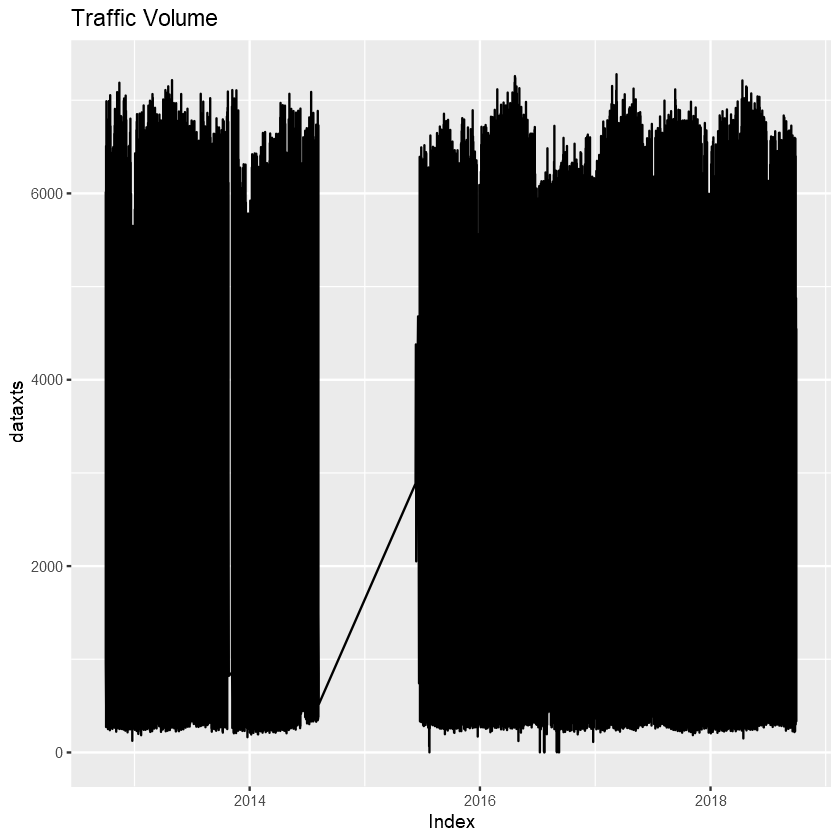

In [137]:
autoplot(dataxts, main= "Traffic Volume")

                                         Figure 1: Traffic Volume Across 2012-2018

In [52]:
data[c(15971:15973),]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
15971,None,292.380,0,0,1,Clear,sky is clear,2014-08-08 01:00:00,516
15972,None,287.586,0,0,92,Rain,light rain,2015-06-11 20:00:00,2886
15973,None,297.543,0,0,0,Clear,Sky is Clear,2015-06-12 18:00:00,4380


There is a huge data loss in the data. For the train part I will discard the data before the loss. We could use techniques to fill the data. However as we can see above, there is a 11 month data loss and filling the traffic volume with using mean, median or other techniques will result bias. In addition to that, it is impossible to fill the rain_1h, temp, snow_1h etc. Therefore, I will use the data after, 2015-06-11 20:00:00

In [139]:
data=data[c(15972:48204),]

Subsetting after the data loss.

In [54]:
head(data)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
15972,None,287.586,0,0,92,Rain,light rain,2015-06-11 20:00:00,2886
15973,None,297.543,0,0,0,Clear,Sky is Clear,2015-06-12 18:00:00,4380
15974,None,292.061,0,0,8,Clear,sky is clear,2015-06-12 20:00:00,3095
15975,None,292.061,0,0,8,Clear,sky is clear,2015-06-12 21:00:00,3299
15976,None,294.840,0,0,76,Clouds,broken clouds,2015-06-13 21:00:00,3040
15977,None,293.137,0,0,56,Clouds,broken clouds,2015-06-13 23:00:00,2051


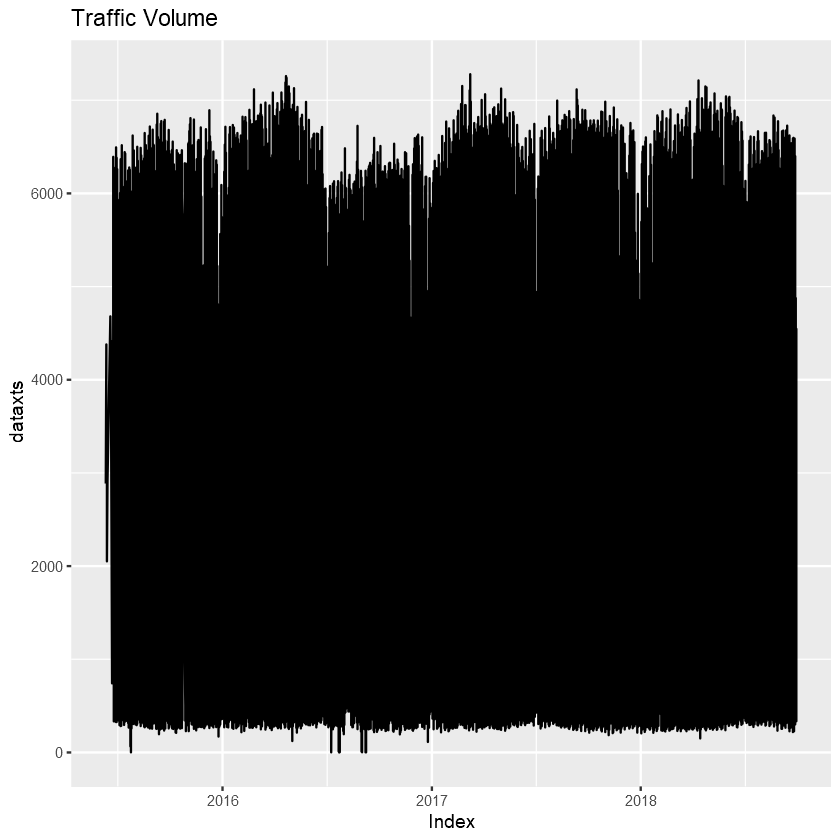

In [140]:
dataxts <- xts(data$traffic_volume, order.by=as.POSIXct(data$date_time))
autoplot(dataxts, main="Traffic Volume")

                                        Figure 2: Traffic Volume Across 2015-2018

New data looks better. Now, let's check other variables

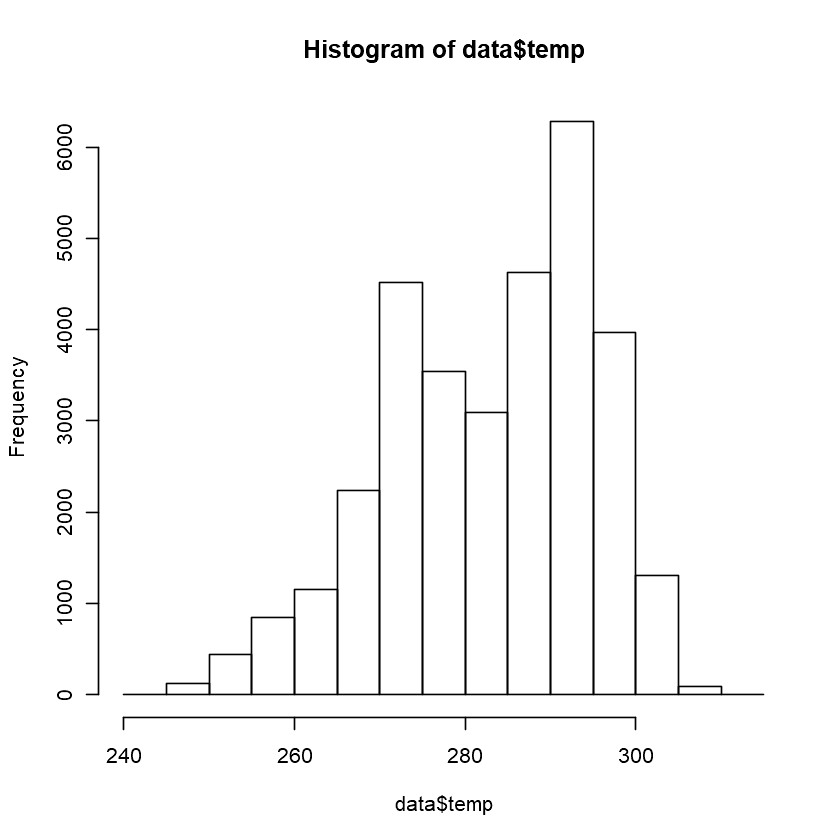

In [56]:
hist(data$temp)

                                        Figure 3: Histogram of temperature data

Histogram looks normal, there are no outliers.

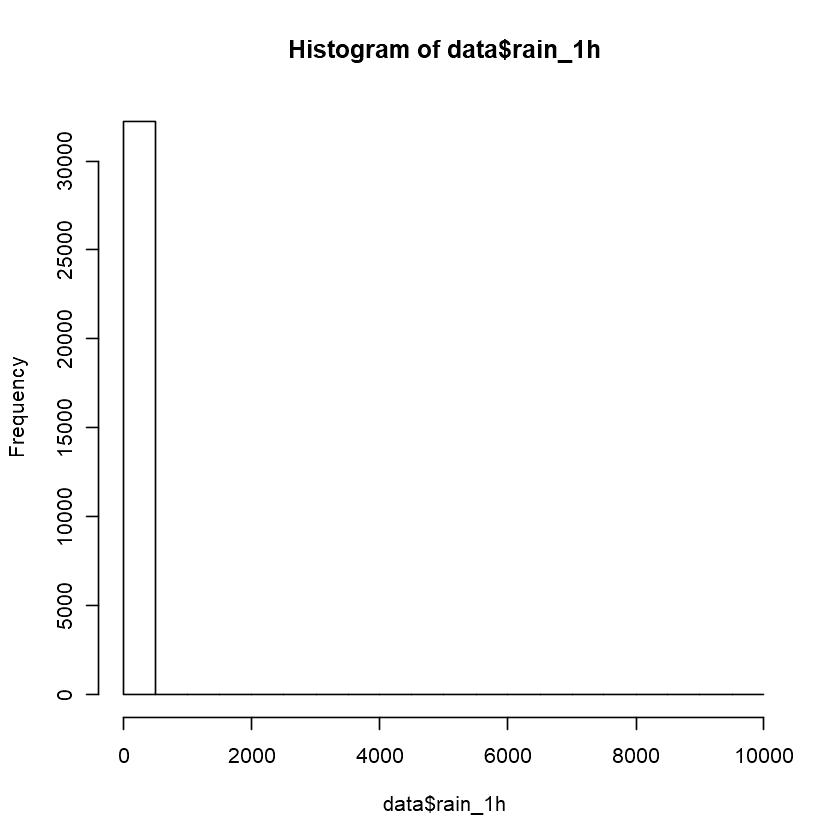

In [57]:
hist(data$rain_1h)

                                           Figure 4: Histogram of Rain Data

Histogram suggests that there is a outlier in data, most of the data is highly skewed near 0. Also, there is a data between 8000-10000. Lets find it.

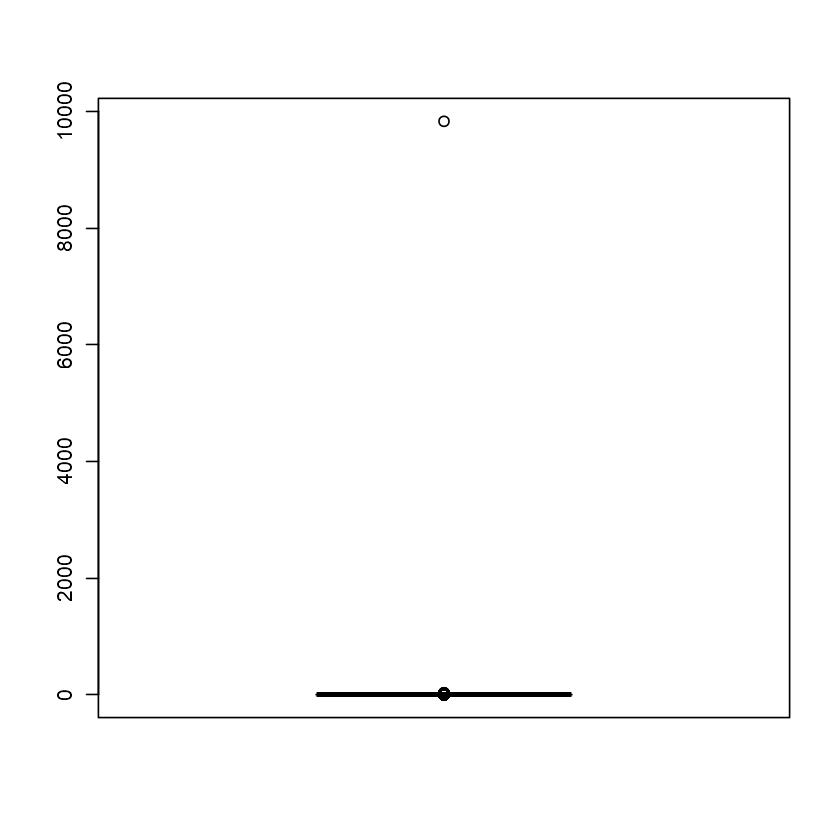

In [58]:
boxplot(data$rain_1h)

                                         Figure 5: Boxplot of Rain Data

Boxplot confirms our hypothesis there is a outlier in rain data.

In [5]:
data[data$rain_1h>50,]
data[data$weather_description=="very heavy rain",]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24873,None,302.11,9831.3,0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
16301,None,294.87,23.80,0,90,Rain,very heavy rain,2015-07-06 03:00:00,346
16505,None,292.02,27.57,0,90,Rain,very heavy rain,2015-07-13 00:00:00,492
16924,None,295.12,20.24,0,90,Rain,very heavy rain,2015-07-28 07:00:00,4302
17438,None,294.49,25.46,0,90,Rain,very heavy rain,2015-08-16 21:00:00,2118
24873,None,302.11,9831.30,0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535
25482,None,294.92,16.51,0,32,Rain,very heavy rain,2016-08-04 07:00:00,5724
25640,None,292.70,18.42,0,80,Rain,very heavy rain,2016-08-10 21:00:00,1904
25780,None,297.71,31.75,0,0,Rain,very heavy rain,2016-08-16 17:00:00,4913
25962,None,294.07,20.07,0,40,Rain,very heavy rain,2016-08-23 22:00:00,1520


We will change the outlier with the mean of the rest "very heavy rain".

In [55]:
data[data$weather_description=="very heavy rain"&data$rain_1h>100,]$rain_1h=mean(data[data$weather_description=="very heavy rain"&data$rain_1h<100,]$rain_1h)

In [61]:
data[data$weather_description=="very heavy rain",]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
16301,None,294.87,23.8000,0,90,Rain,very heavy rain,2015-07-06 03:00:00,346
16505,None,292.02,27.5700,0,90,Rain,very heavy rain,2015-07-13 00:00:00,492
16924,None,295.12,20.2400,0,90,Rain,very heavy rain,2015-07-28 07:00:00,4302
17438,None,294.49,25.4600,0,90,Rain,very heavy rain,2015-08-16 21:00:00,2118
24873,None,302.11,22.9775,0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535
25482,None,294.92,16.5100,0,32,Rain,very heavy rain,2016-08-04 07:00:00,5724
25640,None,292.70,18.4200,0,80,Rain,very heavy rain,2016-08-10 21:00:00,1904
25780,None,297.71,31.7500,0,0,Rain,very heavy rain,2016-08-16 17:00:00,4913
25962,None,294.07,20.0700,0,40,Rain,very heavy rain,2016-08-23 22:00:00,1520


We changed it succesfully.

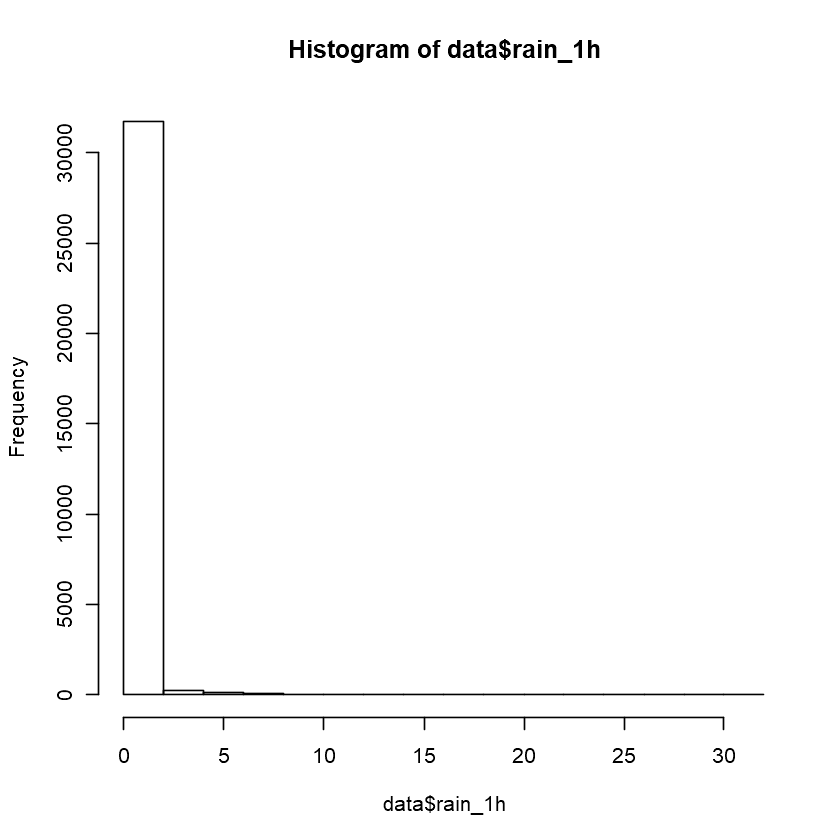

In [62]:
hist(data$rain_1h)

                                        Figure 6: Histogram of corrected Rain Data

Again highly skewed, however we got rid of outlier.

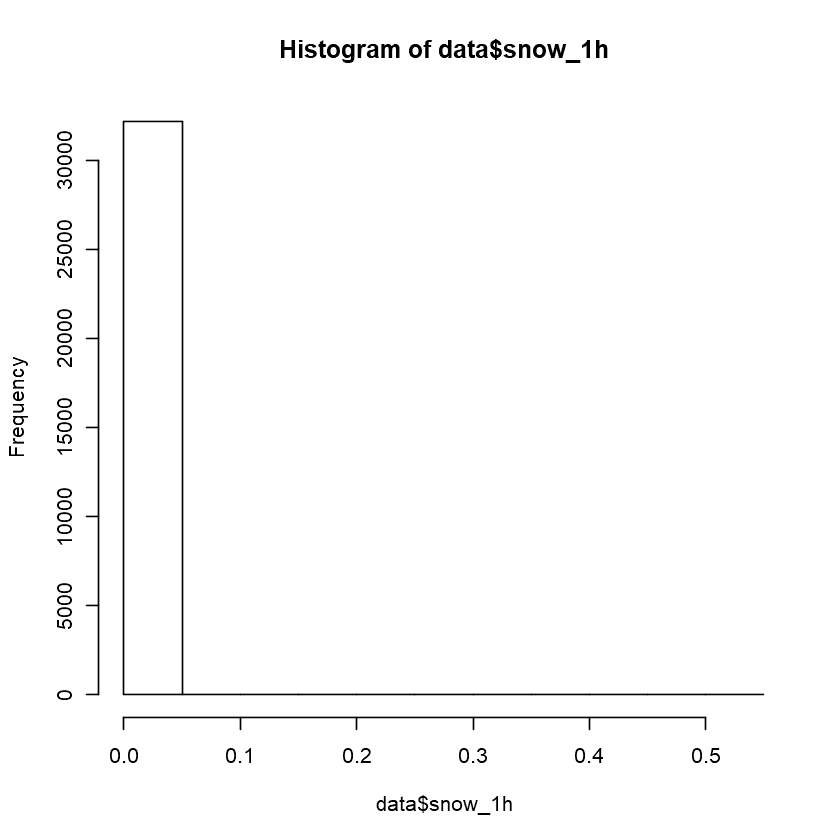

In [63]:
hist(data$snow_1h)

                                        Figure 7: Histogram of Snow Data

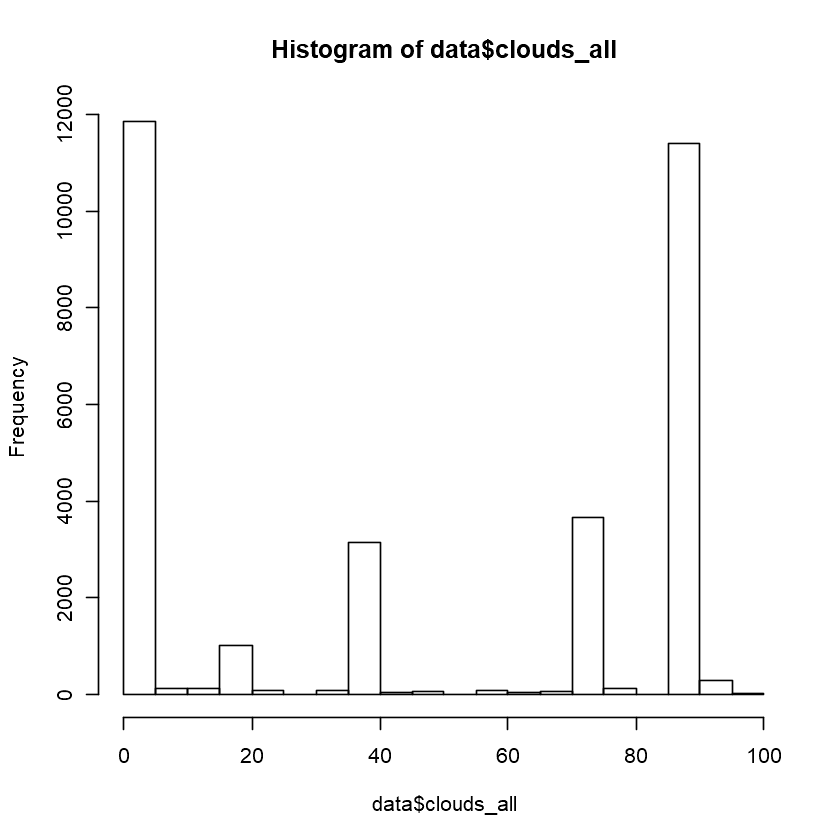

In [64]:
hist(data$clouds_all)

                                       Figure 8: Histogram of Clouds Data

Now, I will analyse factorized data the get rid of unbalances if there is any.

In [65]:
table(data$holiday)


            Christmas Day              Columbus Day          Independence Day 
                        4                         3                         4 
                Labor Day Martin Luther King Jr Day              Memorial Day 
                        6                         5                         3 
            New Years Day                      None                State Fair 
                        4                     32190                         4 
         Thanksgiving Day              Veterans Day      Washingtons Birthday 
                        4                         3                         3 

We can see that, None factor has the huge percent of the data. Lets change this columns as Holiday or None-Holiday.

In [56]:
levels(data$holiday)[levels(data$holiday)!="None"] <- "Holiday"

In [67]:
table(data$holiday)


Holiday    None 
     43   32190 

Hopefully, this will give us better results in forecast.

In [68]:
table(data$weather_main)


       Clear       Clouds      Drizzle          Fog         Haze         Mist 
        9656         8594         1454          699          993         4191 
        Rain        Smoke         Snow       Squall Thunderstorm 
        3853           20         1926            1          846 

In [69]:
table(data$weather_description)


                      broken clouds                             drizzle 
                               2402                                 539 
                         few clouds                                 fog 
                               1037                                 699 
                      freezing rain                                haze 
                                  1                                 993 
            heavy intensity drizzle                heavy intensity rain 
                                 53                                 360 
                         heavy snow             light intensity drizzle 
                                 42                                 856 
        light intensity shower rain                          light rain 
                                 11                                2099 
                light rain and snow                   light shower snow 
                                  3               

There is too much detail in weather description and I will not use it in my forecasts. Since it is impossible to forecast next 24 hours weather description, just using this data. I will drop it. Same holds for weather_main, however I want to see if it has significant effect on regression.

In [57]:
data = subset(data, select = -c(weather_description) )

In [71]:
cor(data[,c("traffic_volume","temp","rain_1h","snow_1h")])

,traffic_volume,temp,rain_1h,snow_1h
traffic_volume,1.0000000000,0.12475003,-0.024881270,0.0009318919
temp,0.1247500271,1.00000000,0.099716897,-0.0313993836
rain_1h,-0.0248812696,0.09971690,1.000000000,0.0025805523
snow_1h,0.0009318919,-0.03139938,0.002580552,1.0000000000


Features are not correlated.

In order to look for seasonal effects on traffic_volume, lets split date time as Hour, weekday etc.

In [58]:
data$Hour<-substr(data$date_time,start=12,stop=13)
data$day <- weekdays(as.Date(data$date_time))

In [73]:
head(data)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,Hour,day
15972,None,287.586,0,0,92,Rain,2015-06-11 20:00:00,2886,20,Perşembe
15973,None,297.543,0,0,0,Clear,2015-06-12 18:00:00,4380,18,Cuma
15974,None,292.061,0,0,8,Clear,2015-06-12 20:00:00,3095,20,Cuma
15975,None,292.061,0,0,8,Clear,2015-06-12 21:00:00,3299,21,Cuma
15976,None,294.840,0,0,76,Clouds,2015-06-13 21:00:00,3040,21,Cumartesi
15977,None,293.137,0,0,56,Clouds,2015-06-13 23:00:00,2051,23,Cumartesi


In [59]:
data$Hour <- factor(data$Hour)
data$day <- factor(data$day)

We need to factorize newly created features.

In [28]:
str(data)

'data.frame':	32233 obs. of  10 variables:
 $ holiday       : Factor w/ 2 levels "Holiday","None": 2 2 2 2 2 2 2 2 2 2 ...
 $ temp          : num  288 298 292 292 295 ...
 $ rain_1h       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ snow_1h       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ clouds_all    : int  92 0 8 8 76 56 88 0 88 12 ...
 $ weather_main  : Factor w/ 11 levels "Clear","Clouds",..: 7 1 1 1 2 2 7 1 7 2 ...
 $ date_time     : Factor w/ 40575 levels "2012-10-02 09:00:00",..: 13899 13900 13901 13902 13903 13904 13905 13906 13907 13908 ...
 $ traffic_volume: int  2886 4380 3095 3299 3040 2051 2909 4681 4045 742 ...
 $ Hour          : Factor w/ 24 levels "00","01","02",..: 21 19 21 22 22 24 21 19 19 1 ...
 $ day           : Factor w/ 7 levels "Cuma","Cumartesi",..: 6 1 1 1 2 2 4 1 2 5 ...


# Regression

In [60]:
rownames(data) <- 1:nrow(data)

Reindexed the data.

In [66]:
traindata <- data[c(1:24284),]
testdata <- data[c(24285:32233),]

Splitting the model to train/test. After 2018 is considered as test data.

In [67]:
traindatamodel1 <- subset(traindata, select=-c(date_time))

I am dropping the date_time column since we have hour and day date for the seasonal effects.

In [13]:
testdata_X_model1 <- subset(testdata, select=-c(traffic_volume,date_time))
testdata_Y_model1 <- testdata$traffic_volume

In [215]:
head(testdata_X_model1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Hour,day
24285,Holiday,249.36,0,0,1,Clear,00,Pazartesi
24286,None,249.08,0,0,1,Clear,01,Pazartesi
24287,None,248.86,0,0,1,Clear,02,Pazartesi
24288,None,248.72,0,0,1,Clear,03,Pazartesi
24289,None,248.43,0,0,1,Clear,04,Pazartesi
24290,None,248.07,0,0,1,Clear,05,Pazartesi


In [14]:
model1<- lm(traffic_volume~. , data=traindatamodel1)

In [82]:
summary(model1)


Call:
lm(formula = traffic_volume ~ ., data = traindatamodel1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4870.5  -405.2     0.5   492.2  3007.9 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 85.2648   201.6789   0.423 0.672463    
holidayNone                140.9911   143.1383   0.985 0.324634    
temp                         3.6875     0.5100   7.231 4.95e-13 ***
rain_1h                    -43.9781     5.4342  -8.093 6.10e-16 ***
snow_1h                   -810.8557   453.1468  -1.789 0.073565 .  
clouds_all                  -0.7004     0.2184  -3.207 0.001343 ** 
weather_mainClouds          28.6080    19.3011   1.482 0.138301    
weather_mainDrizzle         44.7384    30.9848   1.444 0.148785    
weather_mainFog            -18.7306    38.7437  -0.483 0.628780    
weather_mainHaze           -91.4327    33.7680  -2.708 0.006780 ** 
weather_mainMist           -27.9090    22.3691  -1.248 0.212169    
weather_mai

From the summary, we can conclude that seasonality is important part of the forecast. Also temperature and rain_1h is significant. Lets calculate the RMSE and check for better models.

In [15]:
rmse1 <- sqrt(sum((testdata_Y_model1-forecast(model1,testdata_X_model1)$mean)^2)/length(testdata_Y_model1))

In [16]:
rmse1

[1] 815.5995

We can do better with more sophisticated models. In addition to RMSE. Adjusted R-square can be higher.

## Model 2

In [69]:
traindatamodel2 <- subset(traindata, select=-c(date_time,weather_main,rain_1h,snow_1h))

In [70]:
testdata_X_model2 <- subset(testdata, select=-c(traffic_volume,date_time,weather_main,rain_1h,snow_1h))
testdata_Y_model2 <- testdata$traffic_volume

In [71]:
head(traindatamodel2)

holiday,temp,clouds_all,traffic_volume,Hour,day
None,287.586,92,2886,20,Perşembe
None,297.543,0,4380,18,Cuma
None,292.061,8,3095,20,Cuma
None,292.061,8,3299,21,Cuma
None,294.840,76,3040,21,Cumartesi
None,293.137,56,2051,23,Cumartesi


In [97]:
head(testdata_X_model2 )

,holiday,temp,clouds_all,Hour,day
24285,Holiday,249.36,1,00,Pazartesi
24286,None,249.08,1,01,Pazartesi
24287,None,248.86,1,02,Pazartesi
24288,None,248.72,1,03,Pazartesi
24289,None,248.43,1,04,Pazartesi
24290,None,248.07,1,05,Pazartesi


In [72]:
model2<- lm(traffic_volume~. , data=traindatamodel2)

In [73]:
summary(model2)


Call:
lm(formula = traffic_volume ~ ., data = traindatamodel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5164.1  -404.2    -0.9   488.5  3002.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -135.5552   193.1069  -0.702 0.482705    
holidayNone    151.7580   143.5284   1.057 0.290368    
temp             4.4143     0.4658   9.476  < 2e-16 ***
clouds_all      -0.9224     0.1337  -6.901 5.28e-12 ***
Hour01        -318.9429    35.6552  -8.945  < 2e-16 ***
Hour02        -462.4744    35.6567 -12.970  < 2e-16 ***
Hour03        -489.2712    35.6839 -13.711  < 2e-16 ***
Hour04        -133.1341    35.4236  -3.758 0.000171 ***
Hour05        1280.7489    35.7795  35.796  < 2e-16 ***
Hour06        3357.7203    35.3455  94.997  < 2e-16 ***
Hour07        3923.2370    35.6689 109.990  < 2e-16 ***
Hour08        3744.3632    35.6418 105.055  < 2e-16 ***
Hour09        3527.3969    36.0285  97.906  < 2e-16 ***
Hour10        3335.3689    35.5856  93.728 

With the weather, rain, snow columns are dropped. Our model got little bit worse. However, since these columns are not significant, effects of these data can be ignored without high loss in model performance.

In [74]:
rmse2 <- sqrt(sum((testdata_Y_model2-forecast(model2,testdata_X_model2)$mean)^2)/length(testdata_Y_model2))

In [75]:
rmse2

[1] 819.683

## Model 3

In [78]:
data$lag <- shift(data$traffic_volume, 1)
data$lag24 <- shift(data$traffic_volume, 24)

For this model, I will introduce two new columns. Which are Lag1 and Lag24, the idea behind it is, the traffic volume right now is somehow related with 24 hours ago's traffic volume and the traffic volume one hour ago.

In [79]:
traindata <- data[c(1:24284),]
testdata <- data[c(24285:32233),]

In [80]:
traindata<-traindata[c(25:24284),]

In [81]:
traindatamodel3 <- subset(traindata, select=-c(date_time,weather_main,rain_1h,snow_1h))

In [82]:
testdata_X_model3 <- subset(testdata, select=-c(traffic_volume,date_time,weather_main,rain_1h,snow_1h))
testdata_Y_model3 <- testdata$traffic_volume

I dropped the first 24 rows since they have NA's in lag columns in training data.

In [83]:
model3<- lm(traffic_volume~. , data=traindatamodel3)
summary(model3)


Call:
lm(formula = traffic_volume ~ ., data = traindatamodel3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4502.7  -217.1   -16.0   241.7  3767.7 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.889e+02  1.230e+02  -2.349 0.018819 *  
holidayNone   2.343e+01  9.140e+01   0.256 0.797696    
temp          8.773e-01  2.976e-01   2.948 0.003204 ** 
clouds_all   -2.515e-01  8.524e-02  -2.950 0.003177 ** 
Hour01        7.353e+01  2.280e+01   3.225 0.001263 ** 
Hour02        1.437e+02  2.294e+01   6.263 3.84e-10 ***
Hour03        2.066e+02  2.303e+01   8.972  < 2e-16 ***
Hour04        5.236e+02  2.287e+01  22.901  < 2e-16 ***
Hour05        1.561e+03  2.294e+01  68.055  < 2e-16 ***
Hour06        2.576e+03  2.307e+01 111.678  < 2e-16 ***
Hour07        1.930e+03  2.517e+01  76.698  < 2e-16 ***
Hour08        1.438e+03  2.587e+01  55.582  < 2e-16 ***
Hour09        1.300e+03  2.586e+01  50.284  < 2e-16 ***
Hour10        1.265e+03  2.524e+01  50.106 

With the lags introduced our adjusted R-square increase to 0.9316. Lets calculate RMSE.

In [84]:
rmse3 <- sqrt(sum((testdata_Y_model3-forecast(model3,testdata_X_model3)$mean)^2)/length(testdata_Y_model3))

In [85]:
rmse3

[1] 460.5004

We got a great decrease in our RMSE.

In [86]:
print(paste0("RMSE of Model1: ", rmse1))
print(paste0("RMSE of Model2: ", rmse2))
print(paste0("RMSE of Model3: ", rmse3))

[1] "RMSE of Model1: 815.599520144052"
[1] "RMSE of Model2: 819.683002961179"
[1] "RMSE of Model3: 460.500421716018"


From the RMSE's above, we can conclude best model is the Model 3. The difference in Model 3 is it has lag features too.

# ARIMA

## Without external regressor

In [87]:
head(data)

holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,Hour,day,lag,lag24
None,287.586,0,0,92,Rain,2015-06-11 20:00:00,2886,20,Perşembe,NA,NA
None,297.543,0,0,0,Clear,2015-06-12 18:00:00,4380,18,Cuma,2886,NA
None,292.061,0,0,8,Clear,2015-06-12 20:00:00,3095,20,Cuma,4380,NA
None,292.061,0,0,8,Clear,2015-06-12 21:00:00,3299,21,Cuma,3095,NA
None,294.840,0,0,76,Clouds,2015-06-13 21:00:00,3040,21,Cumartesi,3299,NA
None,293.137,0,0,56,Clouds,2015-06-13 23:00:00,2051,23,Cumartesi,3040,NA


In [3]:
str(data)

'data.frame':	48204 obs. of  9 variables:
 $ holiday            : Factor w/ 12 levels "Christmas Day",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ temp               : num  288 289 290 290 291 ...
 $ rain_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ snow_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ clouds_all         : int  40 75 90 90 75 1 1 1 20 20 ...
 $ weather_main       : Factor w/ 11 levels "Clear","Clouds",..: 2 2 2 2 2 1 1 1 2 2 ...
 $ weather_description: Factor w/ 38 levels "broken clouds",..: 23 1 18 18 1 26 26 26 3 3 ...
 $ date_time          : Factor w/ 40575 levels "2012-10-02 09:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ traffic_volume     : int  5545 4516 4767 5026 4918 5181 5584 6015 5791 4770 ...


In [88]:
regression <-aggregate(data$temp~data$date_time, FUN=mean)

I aggregated data for external regressor because there were some data, which has same date_time, same temp, same traffic_volume however different weather_main. Since we will not use weather_main in ARIMA, this rows will cause problems.

In [89]:
tail(regression)

,data$date_time,data$temp
26672,2018-09-30 18:00:00,284.20
26673,2018-09-30 19:00:00,283.45
26674,2018-09-30 20:00:00,282.76
26675,2018-09-30 21:00:00,282.73
26676,2018-09-30 22:00:00,282.09
26677,2018-09-30 23:00:00,282.12


In [90]:
names(regression)[names(regression) == "data$traffic_volume"] <- "traffic_volume"
names(regression)[names(regression) == 'data$temp'] <- 'temp'

In [91]:
trainregdata <- regression[c(1:20144),]
testregdata <- regression[c(20145:26677),]

In [92]:
datar <- aggregate(data$traffic_volume~data$date_time, FUN=mean)

I aggregated data because there were some data, which has same date_time, same temp, same traffic_volume however different weather_main. Since we will not use weather_main in ARIMA, this rows will cause problems.

In [93]:
names(datar)[names(datar) == "data$traffic_volume"] <- "traffic_volume"
names(datar)[names(datar) == 'data$date_time'] <- 'date_time'

In [98]:
traindata <- datar[c(1:20144),]
testdata <- datar[c(20145:26677),]

In [99]:
model1ar<-auto.arima(as.ts(traindata$traffic_volume,frequency=24))

In [100]:
summary(model1ar)

Series: as.ts(traindata$traffic_volume, frequency = 24) 
ARIMA(3,1,3) with drift 

Coefficients:
         ar1      ar2     ar3      ma1     ma2     ma3   drift
      1.9187  -1.0728  0.0888  -1.5613  0.2290  0.3511  0.0255
s.e.  0.0161   0.0302  0.0155   0.0149  0.0282  0.0137  1.4236

sigma^2 estimated as 497406:  log likelihood=-160689.5
AIC=321395.1   AICc=321395.1   BIC=321458.3

Training set error measures:
                    ME     RMSE      MAE  MPE MAPE      MASE        ACF1
Training set -0.174206 705.1298 495.7888 -Inf  Inf 0.7868646 0.002775279


In [101]:
predictionsar1=forecast(model1ar,h=24)

In [102]:
predictionsar1

      Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
20145       1276.870  373.03062 2180.710  -105.4332 2659.174
20146       1113.249 -410.55930 2637.057 -1217.2146 3443.712
20147       1061.369 -808.53678 2931.274 -1798.4049 3921.142
20148       1110.450 -947.92014 3168.820 -2037.5555 4258.456
20149       1245.753 -902.25733 3393.764 -2039.3454 4530.852
20150       1448.096 -731.24949 3627.441 -1884.9251 4781.116
20151       1695.529 -488.37732 3879.435 -1644.4675 5035.525
20152       1965.212 -219.33555 4149.760 -1375.7652 5306.189
20153       2235.163   41.17777 4429.148 -1120.2479 5590.574
20154       2485.762  270.84313 4700.681  -901.6641 5873.188
20155       2700.919  458.11185 4943.726  -729.1584 6130.996
20156       2868.858  598.64283 5139.074  -603.1367 6340.853
20157       2982.508  691.68317 5273.334  -521.0065 6486.023
20158       3039.503  737.62240 5341.384  -480.9196 6559.925
20159       3041.844  736.95558 5346.733  -483.1788 6566.867
20160       2995.284  69

In [103]:
sqrt(sum((as.numeric(predictionsar1$mean)-testdata[c(1:24),]$traffic_volume)^2)/24)

[1] 760.0941

## Arima With External Regressor

In [105]:
model2ar=auto.arima(as.ts(traindata$traffic_volume,frequency=24),xreg=trainregdata[,'temp'])

In [106]:
summary(model2ar)

Series: as.ts(traindata$traffic_volume, frequency = 24) 
Regression with ARIMA(3,1,0) errors 

Coefficients:
         ar1      ar2      ar3      xreg
      0.5562  -0.1927  -0.0615  103.2965
s.e.  0.0071   0.0080   0.0071    5.6839

sigma^2 estimated as 601288:  log likelihood=-162599.6
AIC=325209.2   AICc=325209.2   BIC=325248.7

Training set error measures:
                     ME     RMSE      MAE  MPE MAPE      MASE         ACF1
Training set 0.09066517 775.3315 510.4895 -Inf  Inf 0.8101961 -0.002615839


Model suggests a structure with errors are ARIMA(3,1,0)

In [107]:
predictions2ar=forecast(model2ar,h=24,xreg=testregdata[c(1:24),'temp'])

In [108]:
predictions2ar

      Point Forecast      Lo 80    Hi 80      Lo 95     Hi 95
20145       1414.264   420.5131 2408.014  -105.5466  2934.074
20146       1412.652  -425.5824 3250.887 -1398.6852  4223.990
20147       1463.294 -1015.1388 3941.726 -2327.1416  5253.729
20148       1493.994 -1434.1192 4422.108 -2984.1687  5972.157
20149       1473.339 -1792.1538 4738.832 -3520.8014  6467.480
20150       1428.112 -2122.8930 4979.116 -4002.6813  6858.904
20151       1427.334 -2387.9386 5242.606 -4407.6217  7262.289
20152       1382.997 -2685.1942 5451.187 -4838.7643  7604.757
20153       1350.958 -2959.4119 5661.328 -5241.1841  7943.101
20154       1350.220 -3190.5778 5891.017 -5594.3309  8294.771
20155       1504.089 -3255.5765 6263.755 -5775.1914  8783.370
20156       1684.121 -3284.1375 6652.380 -5914.1749  9282.418
20157       1822.431 -3345.6774 6990.539 -6081.5087  9726.371
20158       1956.538 -3403.9335 7317.010 -6241.5959 10154.673
20159       2111.387 -3434.8540 7657.628 -6370.8566 10593.630
20160   

In [109]:
sqrt(sum((as.numeric(predictions2ar$mean)-testdata[c(1:24),]$traffic_volume)^2)/24)

[1] 771.2522

RMSE of ARIMA with external regressor.

In [111]:
sqrt(sum(((as.numeric(predictionsar1$mean)+predictions2ar$mean)/2-testdata[c(1:24),]$traffic_volume)^2)/24)

[1] 677.506

RMSE if we use, average of two predictions. As we expect, ensemble method gives better results.

For the model part, I wanted to introduce other models which use SARIMA with frequency 24. However my computational power did not let me to do it. There can be better models, since auto.arima could not find any seasonal components.

## Ensemble

In [114]:
testdata <- data[c(24285:32233),]

In [115]:
conclusion <- testdata[c(1:24),]

In [116]:
conclusion

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,Hour,day,lag,lag24
24285,Holiday,249.36,0,0,1,Clear,2018-01-01 00:00:00,1478,00,Pazartesi,1580,1000
24286,None,249.08,0,0,1,Clear,2018-01-01 01:00:00,1408,01,Pazartesi,1478,711
24287,None,248.86,0,0,1,Clear,2018-01-01 02:00:00,931,02,Pazartesi,1408,519
24288,None,248.72,0,0,1,Clear,2018-01-01 03:00:00,585,03,Pazartesi,931,303
24289,None,248.43,0,0,1,Clear,2018-01-01 04:00:00,381,04,Pazartesi,585,285
24290,None,248.07,0,0,1,Clear,2018-01-01 05:00:00,434,05,Pazartesi,381,457
24291,None,248.15,0,0,1,Clear,2018-01-01 06:00:00,686,06,Pazartesi,434,808
24292,None,247.76,0,0,1,Clear,2018-01-01 07:00:00,677,07,Pazartesi,686,959
24293,None,247.45,0,0,5,Clear,2018-01-01 08:00:00,811,08,Pazartesi,677,1319
24294,None,247.43,0,0,1,Clear,2018-01-01 09:00:00,1122,09,Pazartesi,811,2384


In [117]:
predictionsmodel1 <- forecast(model1, conclusion[,c("holiday","temp","rain_1h","snow_1h","weather_main","clouds_all","Hour","day")])
predictionsmodel2 <- forecast(model2, conclusion[,c("holiday","temp","clouds_all","Hour","day")])
predictionsmodel3 <- forecast(model3, conclusion[,c("holiday","temp","clouds_all","Hour","day","lag","lag24")])

Since we have predictions for the first 24 hour of the 2018 for ARIMA. We just need to predict for regression models.

In [120]:
predictionsall=data.frame(matrix(, nrow=24, ncol=0))
predictionsall["time"] = seq(0, 23)
predictionsall["True"]<-conclusion$traffic_volume
predictionsall["Model1"]<-predictionsmodel1$mean
predictionsall["Model2"]<-predictionsmodel2$mean
predictionsall["Model3"]<-predictionsmodel3$mean
predictionsall["ModelAr1"]<-predictionsar1$mean
predictionsall["ModelAr2"]<-predictions2ar$mean
predictionsall["Ensemble"]<-(as.numeric(predictionsar1$mean)+predictions2ar$mean+predictionsmodel1$mean+predictionsmodel2$mean+predictionsmodel3$mean)/5

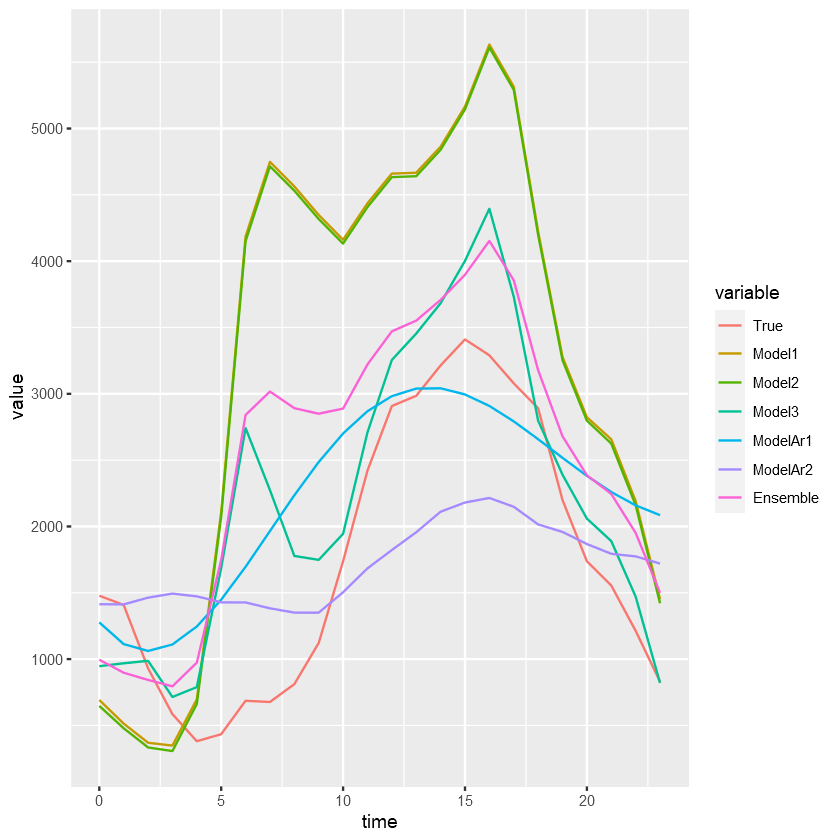

In [143]:
Molten <- melt(predictionsall,id.vars="time")
ggplot(Molten, aes(x = time, y = value, colour = variable)) + geom_line()

                                    Figure 9: Predictions vs True Data

Above figure we can see model predictions and true value together.

In [122]:
results = data.frame("Model1"=0)
results["Model1"]<-sqrt(sum((predictionsmodel1$mean-conclusion$traffic_volume)^2)/24)
results["Model2"]<-sqrt(sum((predictionsmodel2$mean-conclusion$traffic_volume)^2)/24)
results["Model3"]<-sqrt(sum((predictionsmodel3$mean-conclusion$traffic_volume)^2)/24)
results["ModelAr1"]<-sqrt(sum((predictionsar1$mean-conclusion$traffic_volume)^2)/24)
results["ModelAr2"]<-sqrt(sum((predictions2ar$mean-conclusion$traffic_volume)^2)/24)
results["Ensemble"]<-sqrt(sum(((as.numeric(predictionsar1$mean)+predictions2ar$mean+predictionsmodel1$mean+predictionsmodel2$mean+predictionsmodel3$mean)/5-conclusion$traffic_volume)^2)/24)

Created a dataframe with RMSE values for 6 models

In [123]:
results

Model1,Model2,Model3,ModelAr1,ModelAr2,Ensemble
2008.515,1987.377,745.7541,760.0941,771.2522,1054.638


Since the test data starts from 2018, I forecasted the first 24 hours of the 01-01-2018.

In theory, we would expect Ensemble method gives the best RMSE. However, in this test data with the first day of 2018. Regression performed better. There can be several reasons for that, we took the direct average of the models, as the questions suggests. if we take weighted average of the 5 model, Ensemble method could perform better. Again with the graph above, we can say that weighted average for ensemble would perform better.


In addition to that, Model 1 performs bad on the predictions, with equally weighted average it causes problems in Ensemble method.
